# Airline Passenger Satisfaction Analysis

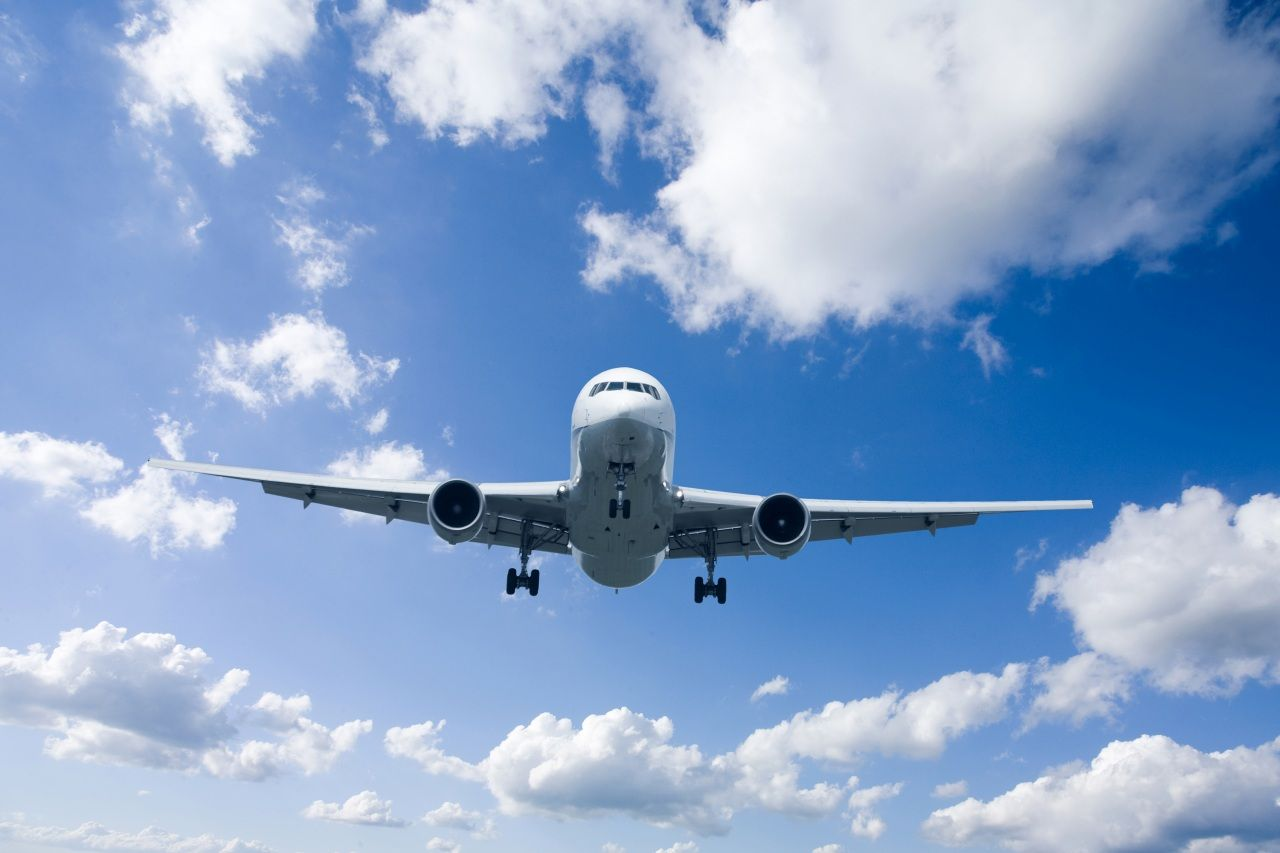

***

***

#  Libraries <a class="anchor" id="section0"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

***

# Data <a class="anchor" id="section1"></a>

The dataset contains an airline passenger satisfaction survey. In this project, we attempt to find the features that affect the satisfaction of the clients the most. In addition, we use different algorithms to predict that satisfaction.

**Content:**
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable; 1-5)
- Departure/Arrival time convenient: Satisfaction level of departure/arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of on-board service
- Leg room service: Satisfaction level of leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level (Satisfaction, neutral or dissatisfaction)

In [2]:
train = pd.read_csv('C:/Users/Naveen/Downloads/airline passenger satisfication/train.csv')
test = pd.read_csv('C:/Users/Naveen/Downloads/airline passenger satisfication/test.csv')

In [3]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


The columns `Unnamed: 0` and `id` are irrelevant and thus will be dropped.

In [5]:
train.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
test.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

***

# 2 Data Visualization <a class="anchor" id="section2"></a>

In [6]:
sns.set_theme(style='whitegrid', palette='Blues_r')

In [7]:
df = train.append(test)

In [9]:
df.shape

(129880, 23)

### Target Variable - Satisfaction

It seems like the data is quite balanced, with slightly more neutral or dissatisfied costumers.

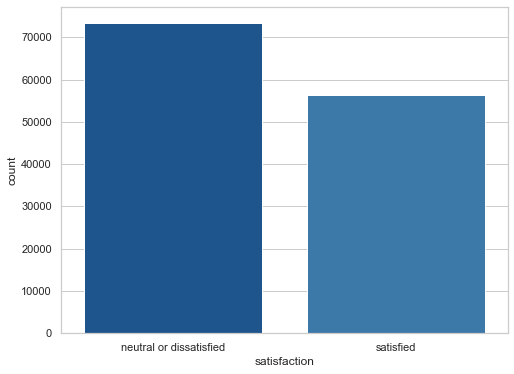

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='satisfaction', data=df)
plt.show()

### Categorical Variables

In [9]:
# define categorical columns list
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

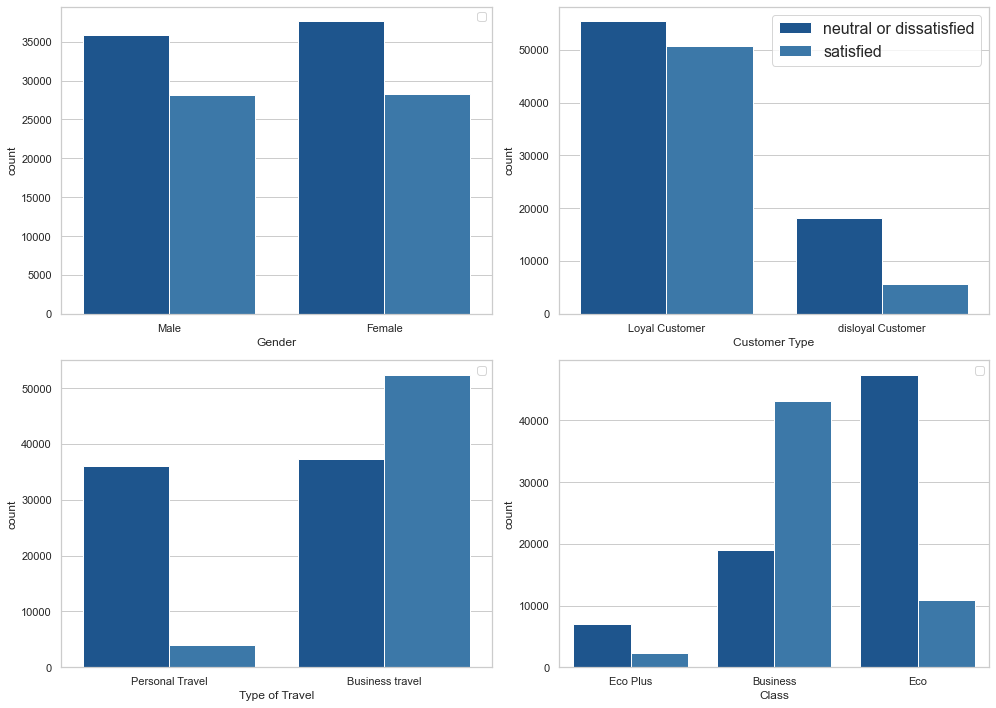

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axs = axs.ravel()

i=0
for col in cat_cols:
    
    # define location
    plt.subplot(2, 2, i+1)
    
    # create plot
    ax = plt.gca()
    axs[i] = sns.countplot(x = col, hue = 'satisfaction', data = df)
    
    # remove legend
    ax.legend('')
    
    i += 1

# add legend
axs[1].legend(loc=1, fontsize=16)

plt.tight_layout()
plt.show()

We see a few interesting points:
- Males and females have similar satisfaction rates.
- Disployal costumers are more dissatisfied compared to loyal costumers.
- Personal travel are more dissatisfied compared to buisness travel.
- Eco class are more dissatisfied compared to buisness class.

### Correlation

In [11]:
# create labels for categorical columns
label = LabelEncoder()

labeled_df = df.copy()
for i in cat_cols:
    labeled_df[i] = label.fit_transform(labeled_df[i])

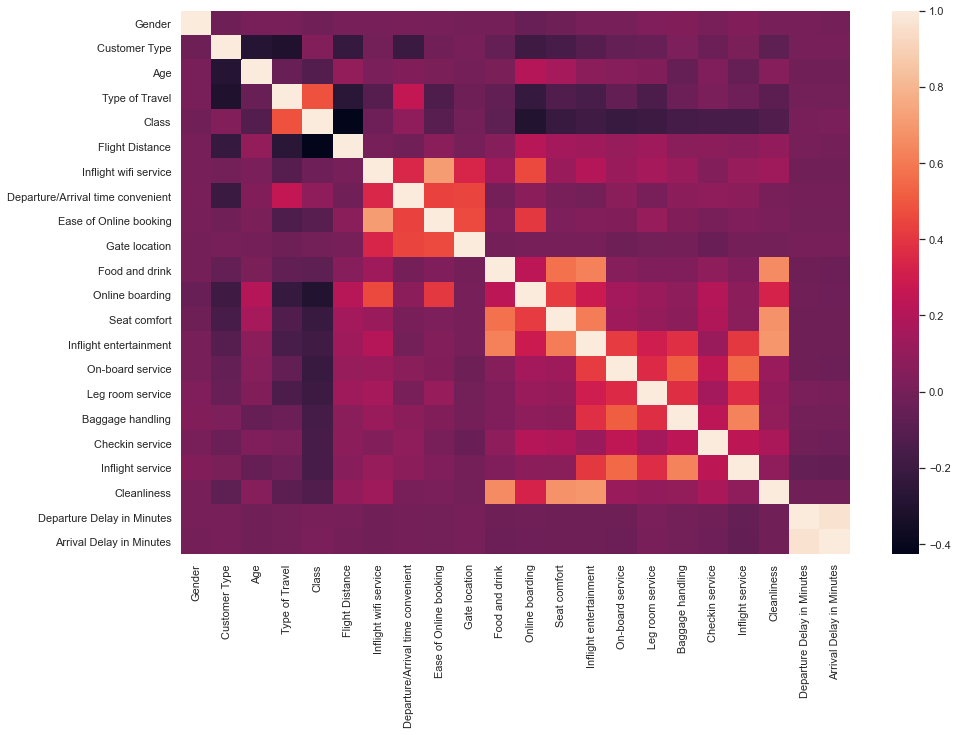

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(labeled_df.corr())
plt.show()

In [13]:
cor = df['Departure Delay in Minutes'].corr(df['Arrival Delay in Minutes'])

Most features don't seem to be very correlated, except for `Departure Delay in Minutes` and `Arrival Delay in Minutes` which have a correlation score of 0.96.

***

#  Data Wrangling <a class="anchor" id="section3"></a>

### Labels

In [14]:
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1

In [15]:
train['satisfaction'] = train['satisfaction'].apply(transform_satisfaction)
test['satisfaction'] = test['satisfaction'].apply(transform_satisfaction)

### Missing Values

In [16]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Earlier, we saw that the variable `Arrival Delay in Minutes` is highly correlated with the variable `Departure Delay in Minutes`, and we wish to drop one. As `Arrival Delay in Minutes` has many missing values, we've decided to drop it.

In [17]:
train.drop('Arrival Delay in Minutes', axis=1, inplace=True)
test.drop('Arrival Delay in Minutes', axis=1, inplace=True)

### One-Hot Encoding

In [18]:
dummy_train = pd.get_dummies(train, columns=cat_cols, drop_first=True)
dummy_test = pd.get_dummies(test, columns=cat_cols, drop_first=True)

In [19]:
dummy_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,1,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,1,1,0,0,0,0


In [20]:
train_df = dummy_train.copy()
test_df = dummy_test.copy()

### Scaling

In [21]:
train_cols = train_df[['Age', 'Flight Distance', 'Departure Delay in Minutes']]
test_cols = test_df[['Age', 'Flight Distance', 'Departure Delay in Minutes']]

In [22]:
scaler = StandardScaler()
scaled_train = pd.DataFrame(scaler.fit_transform(train_cols), columns = train_cols.columns)
scaled_test = pd.DataFrame(scaler.fit_transform(test_cols), columns = test_cols.columns)

In [23]:
scaled_train.head()

,Age,Flight Distance,Departure Delay in Minutes
0,-1.745279,-0.731539,0.266393
1,-0.951360,-0.957184,-0.361375
2,-0.885200,-0.047584,-0.387532
3,-0.951360,-0.629246,-0.099805
4,1.430397,-0.978244,-0.387532


In [24]:
cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

train_df[cols] = scaled_train
test_df[cols] = scaled_test

In [25]:
train_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,3,4,3,1,5,3,5,5,...,4,5,5,0.266393,0,1,0,1,0,1
1,-0.951360,-0.957184,3,2,3,3,1,3,1,1,...,1,4,1,-0.361375,0,1,1,0,0,0
2,-0.885200,-0.047584,2,2,2,2,5,5,5,5,...,4,4,5,-0.387532,1,0,0,0,0,0
3,-0.951360,-0.629246,2,5,5,5,2,2,2,2,...,1,4,2,-0.099805,0,0,0,0,0,0
4,1.430397,-0.978244,3,3,3,3,4,5,5,3,...,3,3,3,-0.387532,1,1,0,0,0,0


#  Classification <a class="anchor" id="section5"></a>

In this section, we apply several classification algorithms on the data. To compare the methods, we calculate the accuracy and F1 score.

**Accuracy**: refers to the ability to correctly predict both positive and negative obseravtions.

$$\text{Accuracy} = \frac{\text{True Positive} + \text{True Negative}}{\text{True Positive} + \text{True Negative} + \text{False Positive} + \text{False Negative}}$$

**F1 Score**: conveys the balance between the precision and the recall.

$$F_1 = 2\cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

where precision and recall and defined by
$$\text{Precision} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}~, \quad \text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

We believe that these two measures are good evaluation metrics for our case because the data is balanced and we want both good precision and recall.

In [26]:
X_train = train_df.drop(['satisfaction'], axis=1)
y_train = train_df['satisfaction']
X_test = test_df.drop(['satisfaction'], axis=1)
y_test = test_df['satisfaction']

We define three functions to avoid code repetition:

1. The `fit_predict` function, uses the input train data to fit a given model, and predicts the label for the test features. A parameters grid is also recieved as input and is used to for hyperparameter optimization.

In [27]:
def fit_predict(X_train, X_test, y_train, model, parameters_grid):
    
    # define grid search
    grid_search = GridSearchCV(estimator=model, param_grid=parameters_grid, cv=10, n_jobs=-1)
    
    # fit estimator
    grid_search.fit(X_train, y_train)
    
    # get best estimator
    best = grid_search.best_estimator_
    
    # predict
    y_pred = best.predict(X_test)
    
    return y_pred, grid_search

2. The `get_class_metrics` function calculates the accuracy and F1 Score, given the test and predicted label, and creates a confusion matrix.

In [28]:
def get_class_metrics(y_test, y_pred):
  
    # calculate accuracy and f1-score
    acc = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    scores = [acc, f1]
    
    # Get confusion matrix
    mat = confusion_matrix(y_test, y_pred)
    
    # create confusion matrix
    sns.heatmap(mat, annot=True, cmap='Blues_r', fmt='d')
    plt.xlabel('Predicted', fontsize=13)
    plt.ylabel('True', fontsize=13)
    plt.title('Confusion Matrix', fontsize=14)
    
    return scores, plt

3. The `display_df` method is used to create and display the dataframe for the accuracy and F1 scores.

In [29]:
def display_df(scores, model):
    df = pd.DataFrame(scores).T
    df = df.rename(index={0: model}, columns={0: 'Accuracy', 1: 'F1 Score'})
    return(df)

##  LogisticRegression <a class="anchor" id="section5.1"></a>

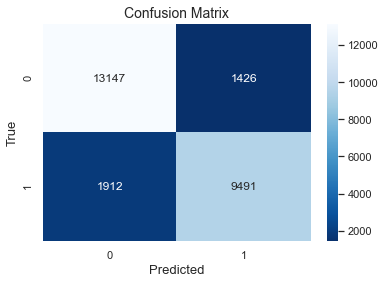

In [30]:
log = LogisticRegression(fit_intercept=True, max_iter=1000, random_state=10)

parameters_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# get predictions
y_pred, grid_search = fit_predict(X_train, X_test, y_train, log, parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)

In [31]:
log_res = display_df(scores, 'Logistic Regression')
log_res

,Accuracy,F1 Score
Logistic Regression,0.871,0.85


# Decision Tree Classifier

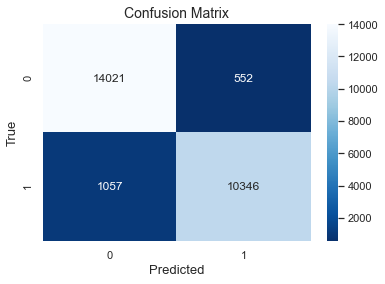

In [47]:
Dt=DecisionTreeClassifier(random_state=10)

parameters_grid = {
    'max_depth': [10],
    'min_samples_leaf': [5],
    'max_features': [ 10]
}
# get predictions
y_pred, grid_search = fit_predict(X_train, X_test, y_train,Dt, parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)

In [68]:
Dt_res = display_df(scores, 'Decision tree Classifier')
Dt_res

,Accuracy,F1 Score
Decision tree Classifier,0.931,0.92


# KNN Classifier

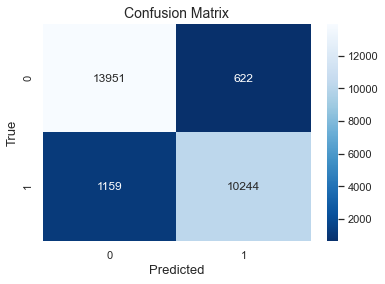

In [64]:
knn=KNeighborsClassifier()
parameters_grid={'n_neighbors':[5],
                  'leaf_size':[30],
                  'p':[2]}


 #get predictions
y_pred, grid_search = fit_predict(X_train, X_test, y_train, knn,parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)

In [65]:
knn_res = display_df(scores, 'KNeighborsClassifier')
knn_res

,Accuracy,F1 Score
KNeighborsClassifier,0.931,0.92


# RandomForestClassifier

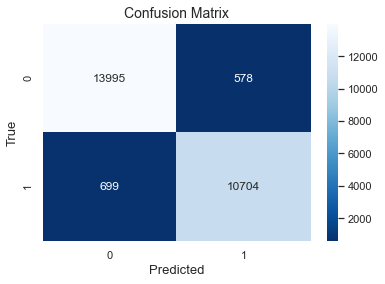

In [49]:
rf = RandomForestClassifier(random_state=10)

parameters_grid = {
    'max_depth': [10],
    'min_samples_leaf': [5],
    'n_estimators': [50],
    'max_features': [ 10]
}

# get predictions
y_pred, grid_search = fit_predict(X_train, X_test, y_train, rf, parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)

In [50]:
rfc_res = display_df(scores, 'Random Forest Classifier')
rfc_res

,Accuracy,F1 Score
Random Forest Classifier,0.951,0.944


##  Ada-Boost Classifier

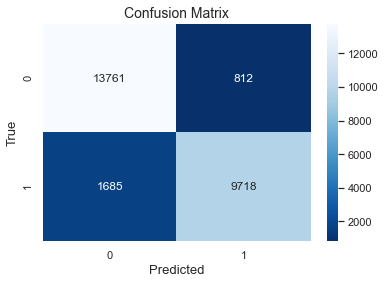

In [52]:
ab = AdaBoostClassifier(random_state=10)

parameters_grid = {
    'n_estimators': [50,75],
    'learning_rate': [0.001, 0.01, 0.1]
}

# get predictions
y_pred, grid_search = fit_predict(X_train, X_test, y_train, ab, parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)

In [53]:
adb_res = display_df(scores, 'Ada-Boost Classifier')
adb_res

,Accuracy,F1 Score
Ada-Boost Classifier,0.904,0.886


# XG Boost Classifier

C:\Users\Naveen\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


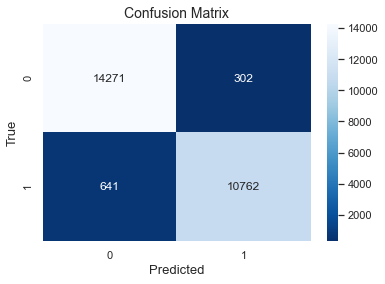

In [54]:
xgb = XGBClassifier(eval_metric='logloss')


parameters_grid = {'n_estimators': [50,75,100],
                   'learning_rate': [0.2,0.5,0.8,1]}
y_pred, grid_search = fit_predict(X_train, X_test, y_train, xgb , parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)

In [55]:
Xgb_res = display_df(scores, 'XGB classifier')
Xgb_res

,Accuracy,F1 Score
XGB classifier,0.964,0.958


# Classification Report

In [66]:
class_res = log_res.copy()
class_res = class_res.append(Dt_res)
class_res = class_res.append(knn_res)
class_res = class_res.append(rfc_res)
class_res = class_res.append(adb_res)
class_res = class_res.append(Xgb_res)

class_res

,Accuracy,F1 Score
Logistic Regression,0.871,0.850
Decision tree Classifier,0.938,0.928
KNeighborsClassifier,0.931,0.920
Random Forest Classifier,0.951,0.944
Ada-Boost Classifier,0.904,0.886
XGB classifier,0.964,0.958


The best predictions were given by the Random Forest algorithm, closely followed by MLP. Next, the Ada-Boost algorithm had quite good prediction, and lastly, the Logistic Regression had the worst predictions.

***

In this project, we attempted to find the features that affect the satisfaction of the clients the most. In addition, we used different algorithms to predict that satisfaction.

We found that the most important features were:
- Cleanliness
- Food and drink
- Inflight entertainment
- Online boarding
- Inflight wifi service
- Type of Travel - Personal Travel 

Next, we used four classification models to predict the satisfaction. The best predictions were given by the Random Forest algorithm.

We assume that we could improve the performance of the algorithms by increasing our hyperparameter tuning.

In [67]:
class_res

,Accuracy,F1 Score
Logistic Regression,0.871,0.850
Decision tree Classifier,0.938,0.928
KNeighborsClassifier,0.931,0.920
Random Forest Classifier,0.951,0.944
Ada-Boost Classifier,0.904,0.886
XGB classifier,0.964,0.958


Lastly, we created a new label that consists of the average score given by the costumers for the following features:
- Gate location
- Seat comfort
- Cleanliness


***